In [2]:
library(readxl)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
df <- read_excel("train.xlsx")

In [4]:
df <-df %>% drop_na()
head(df)

Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PID0x8ce3,11,No,No,Yes,No,5.209058,Willie,Camacho,Tr,⋯,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x8660,4,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,⋯,Multiple,6.397702,abnormal,0,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
PID0x74ab,1,Yes,Yes,No,No,4.612265,Eric,Harness,Mano,⋯,Singular,7.995115,slightly abnormal,1,1,0,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x7678,6,Yes,No,Yes,No,4.620420,Ruth,Homza,Cesareo,⋯,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x952d,10,Yes,Yes,Yes,No,4.751452,James,Whipple,Dvon,⋯,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
PID0x6d89,6,No,Yes,Yes,Yes,4.876896,Miguel,Canada,Zykevious,⋯,Singular,7.370477,normal,1,0,0,0,0,Single-gene inheritance diseases,Hemochromatosis


In [5]:
str(df)

tibble [6,706 × 45] (S3: tbl_df/tbl/data.frame)
 $ Patient Id                                      : chr [1:6706] "PID0x8ce3" "PID0x8660" "PID0x74ab" "PID0x7678" ...
 $ Patient Age                                     : num [1:6706] 11 4 1 6 10 6 10 4 8 1 ...
 $ Genes in mother's side                          : chr [1:6706] "No" "No" "Yes" "Yes" ...
 $ Inherited from father                           : chr [1:6706] "No" "Yes" "Yes" "No" ...
 $ Maternal gene                                   : chr [1:6706] "Yes" "Yes" "No" "Yes" ...
 $ Paternal gene                                   : chr [1:6706] "No" "Yes" "No" "No" ...
 $ Blood cell count (mcL)                          : num [1:6706] 5.21 4.75 4.61 4.62 4.75 ...
 $ Patient First Name                              : chr [1:6706] "Willie" "John" "Eric" "Ruth" ...
 $ Family Name                                     : chr [1:6706] "Camacho" "Sandoval" "Harness" "Homza" ...
 $ Father's name                                   : chr [1:6706] "Tr

In [4]:
df$"Genes in mother's side"<-ifelse(df$"Genes in mother's side"=="Yes",1,0)
df$"Inherited from father"<-ifelse(df$"Inherited from father"=="Yes",1,0)
df$"Maternal gene"<-ifelse(df$"Maternal gene"=="Yes",1,0)
df$"Paternal gene"<-ifelse(df$"Paternal gene"=="Yes",1,0)

head(df)

Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PID0x8ce3,11,0,0,1,0,5.209058,Willie,Camacho,Tr,⋯,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x8660,4,0,1,1,1,4.752272,John,Sandoval,Gregori,⋯,Multiple,6.397702,abnormal,0,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
PID0x74ab,1,1,1,0,0,4.612265,Eric,Harness,Mano,⋯,Singular,7.995115,slightly abnormal,1,1,0,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x7678,6,1,0,1,0,4.620420,Ruth,Homza,Cesareo,⋯,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x952d,10,1,1,1,0,4.751452,James,Whipple,Dvon,⋯,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
PID0x6d89,6,0,1,1,1,4.876896,Miguel,Canada,Zykevious,⋯,Singular,7.370477,normal,1,0,0,0,0,Single-gene inheritance diseases,Hemochromatosis


In [5]:
summary(df)

  Patient Id         Patient Age     Genes in mother's side
 Length:6706        Min.   : 0.000   Min.   :0.0000        
 Class :character   1st Qu.: 3.000   1st Qu.:0.0000        
 Mode  :character   Median : 7.000   Median :1.0000        
                    Mean   : 6.916   Mean   :0.5978        
                    3rd Qu.:11.000   3rd Qu.:1.0000        
                    Max.   :14.000   Max.   :1.0000        
 Inherited from father Maternal gene    Paternal gene    Blood cell count (mcL)
 Min.   :0.0000        Min.   :0.0000   Min.   :0.0000   Min.   :4.146         
 1st Qu.:0.0000        1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:4.767         
 Median :0.0000        Median :1.0000   Median :0.0000   Median :4.900         
 Mean   :0.3998        Mean   :0.5598   Mean   :0.4299   Mean   :4.901         
 3rd Qu.:1.0000        3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:5.036         
 Max.   :1.0000        Max.   :1.0000   Max.   :1.0000   Max.   :5.610         
 Patient First Name 

In [6]:
drop <- c("Patient Id","Genes in mother's side","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute")
df = df[,!(names(df) %in% drop)]

In [7]:
head(df)

Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
11,0,1,0,5.209058,45,44,Alive,Tachypnea,Tachycardia,⋯,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,1,1,1,4.752272,44,42,Alive,Tachypnea,Tachycardia,⋯,Multiple,6.397702,abnormal,0,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
1,1,0,0,4.612265,50,56,Deceased,Normal (30-60),Tachycardia,⋯,Singular,7.995115,slightly abnormal,1,1,0,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
6,0,1,0,4.620420,41,20,Alive,Tachypnea,Tachycardia,⋯,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
10,1,1,0,4.751452,40,57,Deceased,Normal (30-60),Tachycardia,⋯,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
6,1,1,1,4.876896,36,48,Deceased,Tachypnea,Normal,⋯,Singular,7.370477,normal,1,0,0,0,0,Single-gene inheritance diseases,Hemochromatosis


In [8]:
drop <- c("Test 1","Test 2","Test 3","Test 4","Test 5","Parental consent","Place of birth")
df = df[,!(names(df) %in% drop)]

In [9]:
head(df)
tail(df)

Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
11,0,1,0,5.209058,45,44,Alive,Tachypnea,Tachycardia,⋯,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,1,1,1,4.752272,44,42,Alive,Tachypnea,Tachycardia,⋯,Multiple,6.397702,abnormal,0,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
1,1,0,0,4.612265,50,56,Deceased,Normal (30-60),Tachycardia,⋯,Singular,7.995115,slightly abnormal,1,1,0,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
6,0,1,0,4.620420,41,20,Alive,Tachypnea,Tachycardia,⋯,Multiple,3.000000,slightly abnormal,1,0,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
10,1,1,0,4.751452,40,57,Deceased,Normal (30-60),Tachycardia,⋯,Singular,9.382407,abnormal,1,1,0,0,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
6,1,1,1,4.876896,36,48,Deceased,Tachypnea,Normal,⋯,Singular,7.370477,normal,1,0,0,0,0,Single-gene inheritance diseases,Hemochromatosis


Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7,0,0,0,4.713334,27,56,Alive,Normal (30-60),Tachycardia,⋯,Singular,9.342662,normal,1,1,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
12,0,1,0,4.652915,49,40,Alive,Normal (30-60),Normal,⋯,Multiple,8.035952,slightly abnormal,0,1,1,1,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
6,1,0,1,5.117296,48,27,Alive,Tachypnea,Tachycardia,⋯,Singular,3.453291,slightly abnormal,0,0,1,1,0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
13,1,0,1,4.777036,27,58,Alive,Normal (30-60),Normal,⋯,Singular,3.000736,normal,0,0,0,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,0,0,0,5.077554,44,34,Deceased,Normal (30-60),Normal,⋯,Singular,9.566549,inconclusive,1,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
11,0,0,0,4.738067,32,62,Deceased,Normal (30-60),Normal,⋯,Singular,11.188371,normal,1,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes


In [10]:
dim(df)

[1] 6706   31

In [11]:
summary(df)

  Patient Age     Inherited from father Maternal gene    Paternal gene   
 Min.   : 0.000   Min.   :0.0000        Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:0.0000        1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 7.000   Median :0.0000        Median :1.0000   Median :0.0000  
 Mean   : 6.916   Mean   :0.3998        Mean   :0.5598   Mean   :0.4299  
 3rd Qu.:11.000   3rd Qu.:1.0000        3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :14.000   Max.   :1.0000        Max.   :1.0000   Max.   :1.0000  
 Blood cell count (mcL)  Mother's age    Father's age      Status         
 Min.   :4.146          Min.   :18.00   Min.   :20.00   Length:6706       
 1st Qu.:4.767          1st Qu.:26.00   1st Qu.:31.00   Class :character  
 Median :4.900          Median :35.00   Median :42.00   Mode  :character  
 Mean   :4.901          Mean   :34.64   Mean   :41.99                     
 3rd Qu.:5.036          3rd Qu.:43.00   3rd Qu.:53.00                     
 Max.   :5.610          Max.   :

In [6]:
names(df) <- gsub(" ", "_", names(df))
names(df) <- gsub("\\(", "_", names(df))
names(df) <- gsub("\\)", "_", names(df))
names(df) <- gsub("\\/", "_", names(df))
names(df) <- gsub("'", "_", names(df))

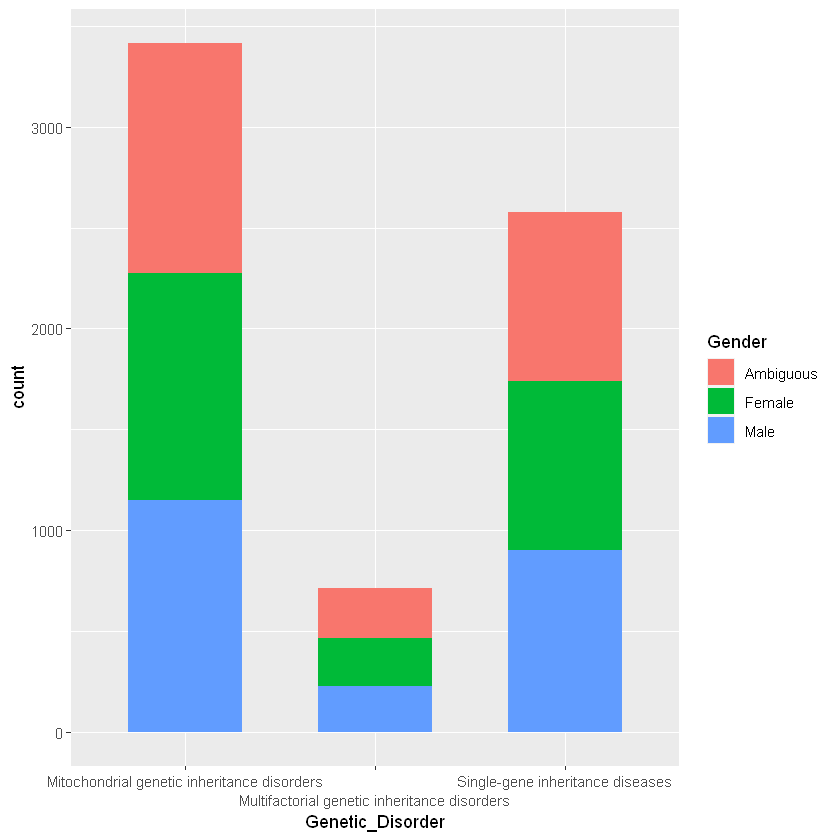

In [13]:
library(ggplot2)
library(grid)
ggplot(data = df, aes(Genetic_Disorder,fill = Gender)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

In [14]:
head(df[, c(11:23), drop=FALSE])

Follow-up,Gender,Birth_asphyxia,Autopsy_shows_birth_defect__if_applicable_,Folic_acid_details__peri-conceptional_,H_O_serious_maternal_illness,H_O_radiation_exposure__x-ray_,H_O_substance_abuse,Assisted_conception_IVF_ART,History_of_anomalies_in_previous_pregnancies,No._of_previous_abortion,Birth_defects,White_Blood_cell_count__thousand_per_microliter_
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Low,Male,Yes,Not applicable,Yes,Yes,No,No,No,Yes,0,Multiple,6.669552
Low,Male,No,Not applicable,Yes,No,No,No,Yes,Yes,1,Multiple,6.397702
High,Male,Not available,None,Yes,No,Yes,Not applicable,Yes,Yes,0,Singular,7.995115
High,Male,No,Not applicable,Yes,Yes,Yes,-,No,No,3,Multiple,3.000000
Low,Ambiguous,No,Yes,No,No,Yes,No,Yes,Yes,3,Singular,9.382407
Low,Ambiguous,No,Yes,Yes,Yes,No,No,Yes,No,1,Singular,7.370477


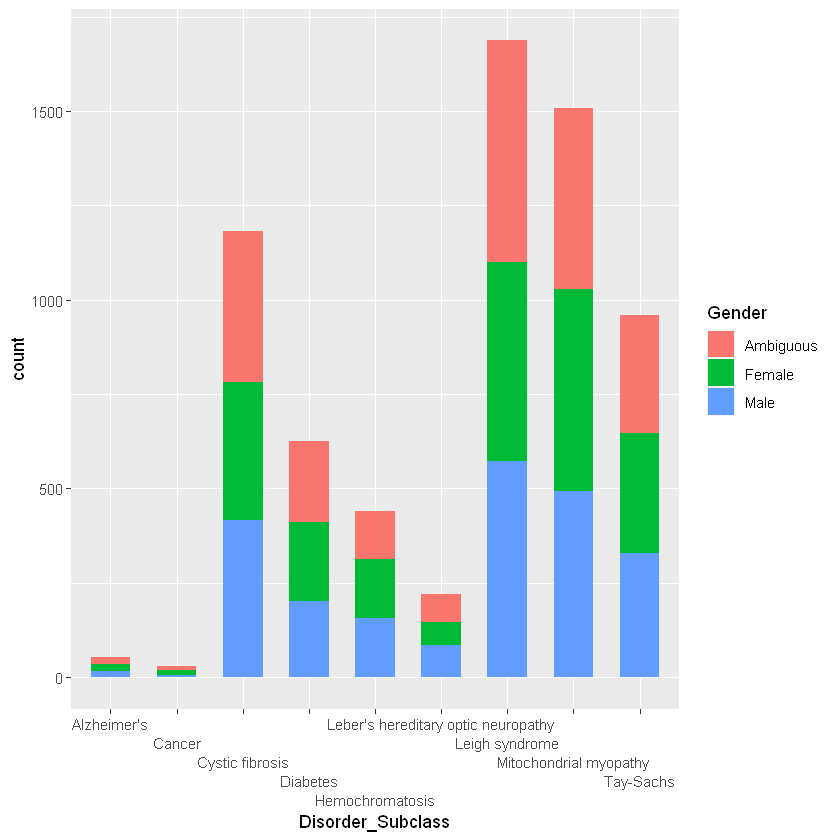

In [15]:
ggplot(data = df, aes(Disorder_Subclass,fill = Gender)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 5))

In [16]:
summary(df)

  Patient_Age     Inherited_from_father Maternal_gene    Paternal_gene   
 Min.   : 0.000   Min.   :0.0000        Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:0.0000        1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 7.000   Median :0.0000        Median :1.0000   Median :0.0000  
 Mean   : 6.916   Mean   :0.3998        Mean   :0.5598   Mean   :0.4299  
 3rd Qu.:11.000   3rd Qu.:1.0000        3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :14.000   Max.   :1.0000        Max.   :1.0000   Max.   :1.0000  
 Blood_cell_count__mcL_  Mother's_age    Father's_age      Status         
 Min.   :4.146          Min.   :18.00   Min.   :20.00   Length:6706       
 1st Qu.:4.767          1st Qu.:26.00   1st Qu.:31.00   Class :character  
 Median :4.900          Median :35.00   Median :42.00   Mode  :character  
 Mean   :4.901          Mean   :34.64   Mean   :41.99                     
 3rd Qu.:5.036          3rd Qu.:43.00   3rd Qu.:53.00                     
 Max.   :5.610          Max.   :

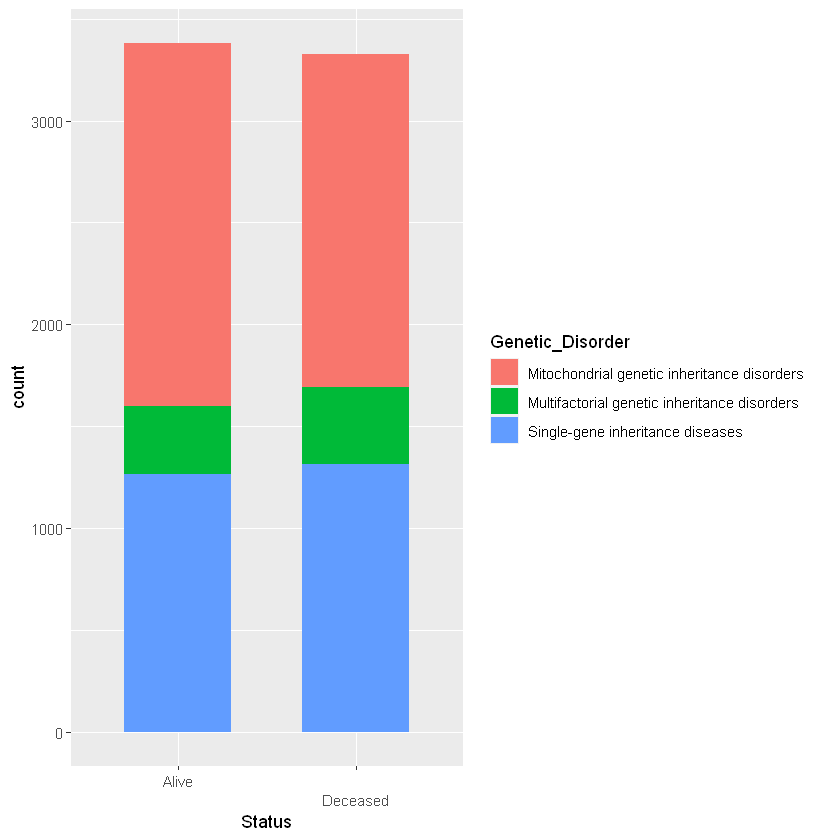

In [17]:
ggplot(data = df, aes(Status,fill = Genetic_Disorder)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

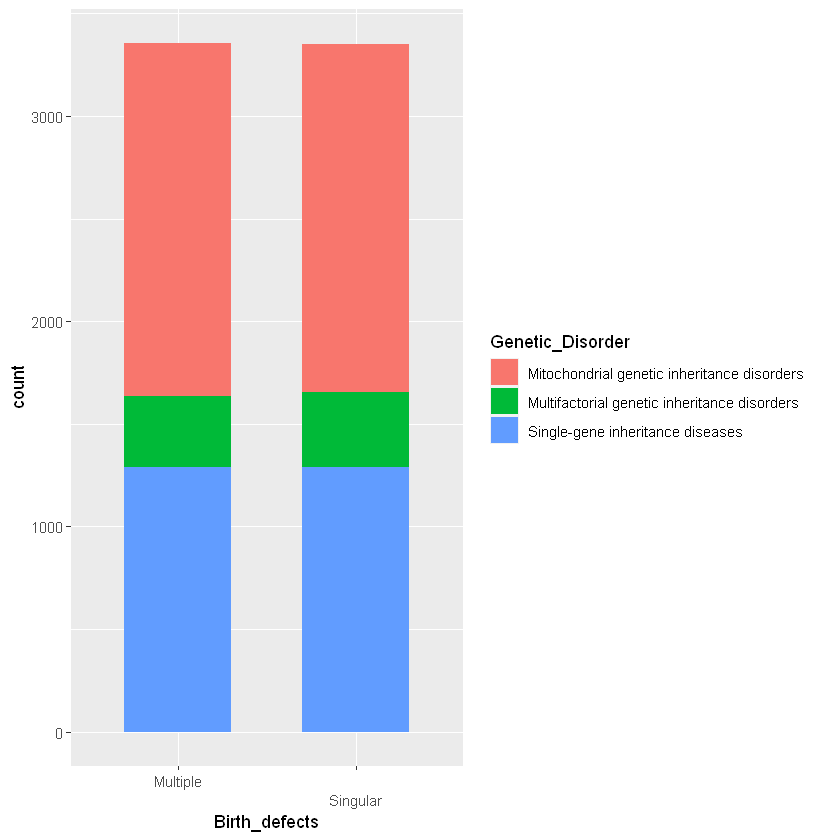

In [18]:

ggplot(data = df, aes(Birth_defects,fill = Genetic_Disorder)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

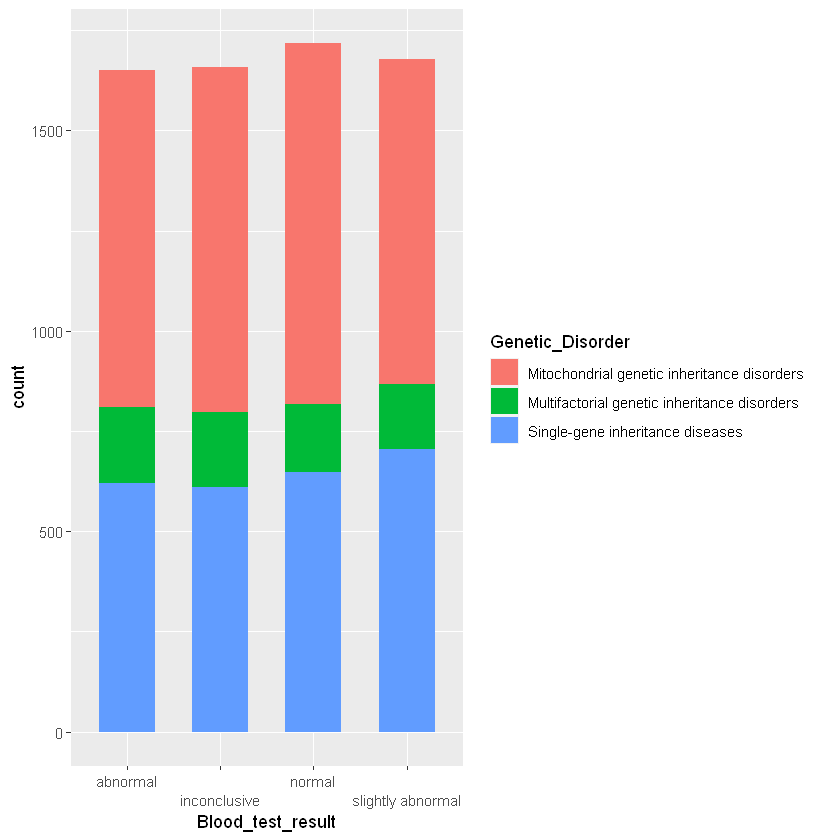

In [19]:
ggplot(data = df, aes( Blood_test_result ,fill = Genetic_Disorder)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

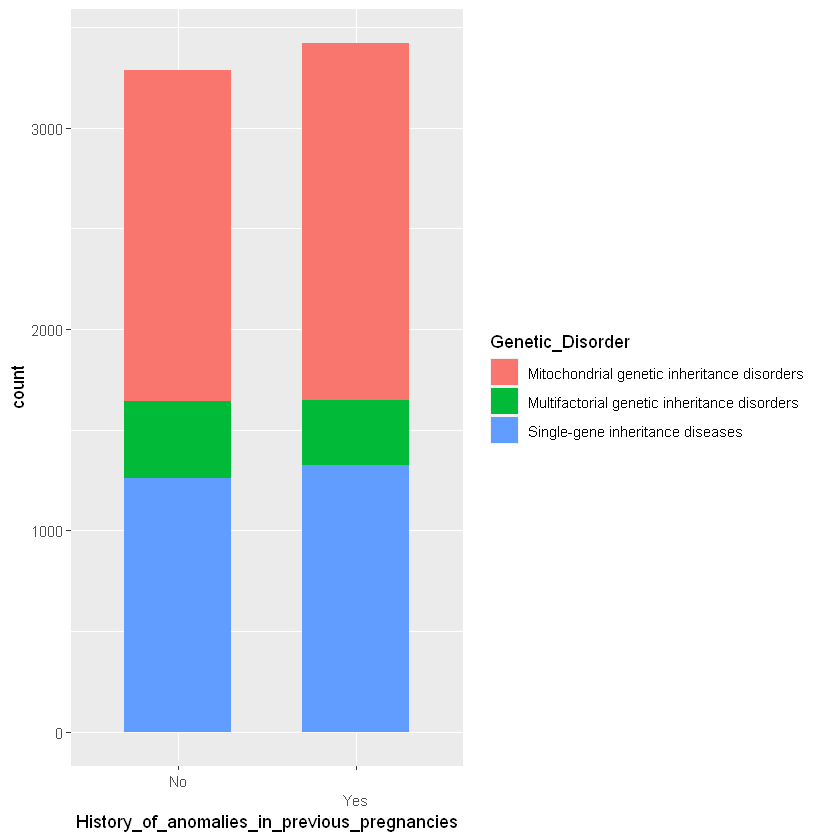

In [20]:
ggplot(data = df, aes( History_of_anomalies_in_previous_pregnancies ,fill = Genetic_Disorder)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

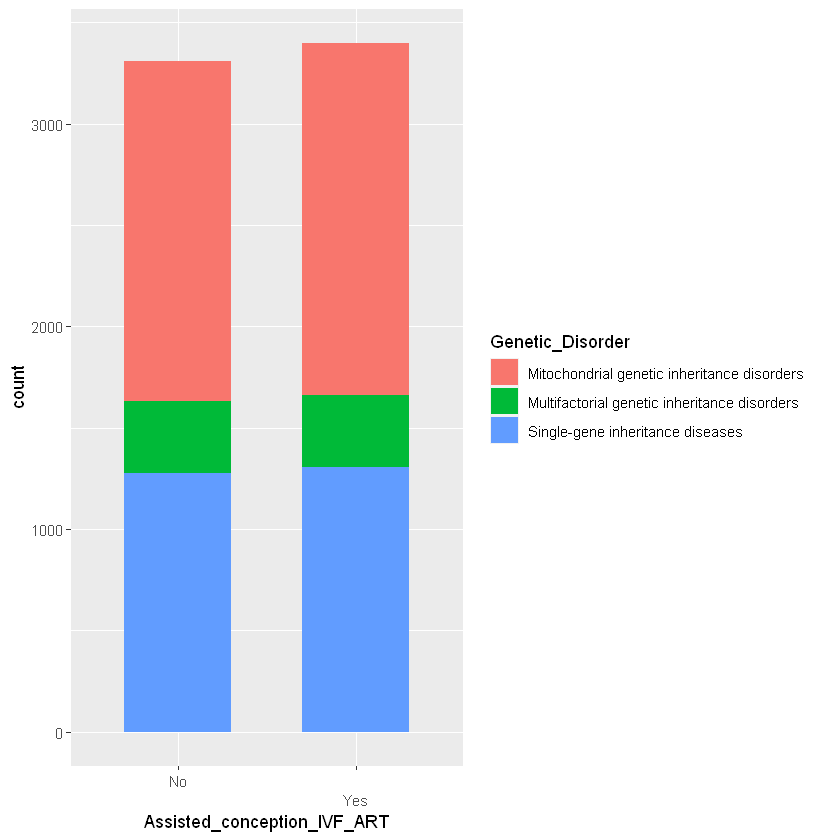

In [21]:
 
ggplot(data = df, aes(Assisted_conception_IVF_ART ,fill = Genetic_Disorder)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

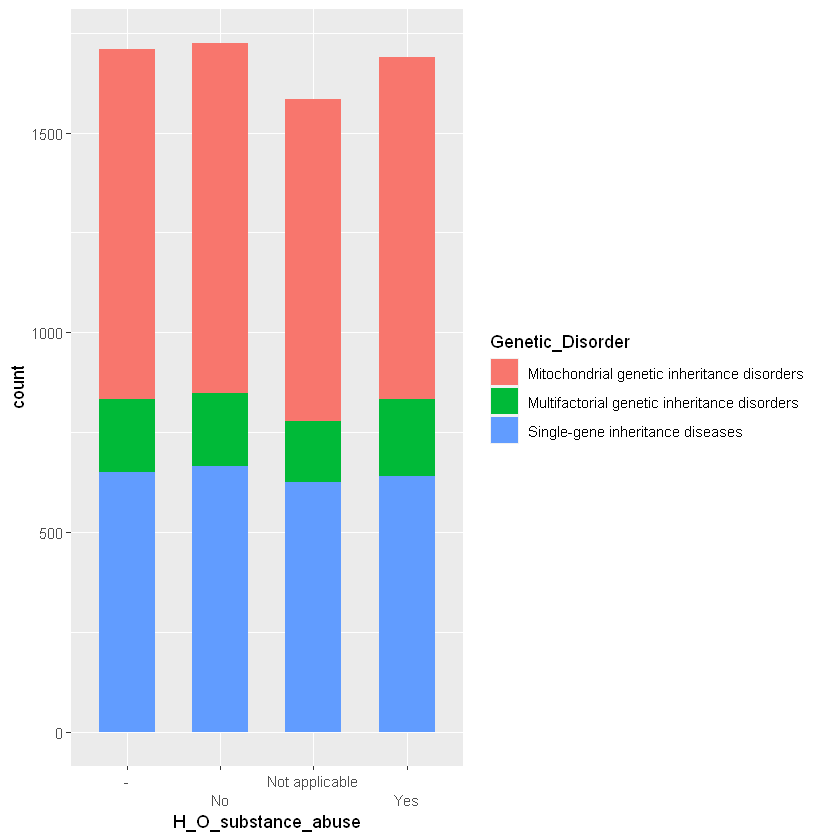

In [22]:
ggplot(data = df, aes(H_O_substance_abuse ,fill = Genetic_Disorder)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

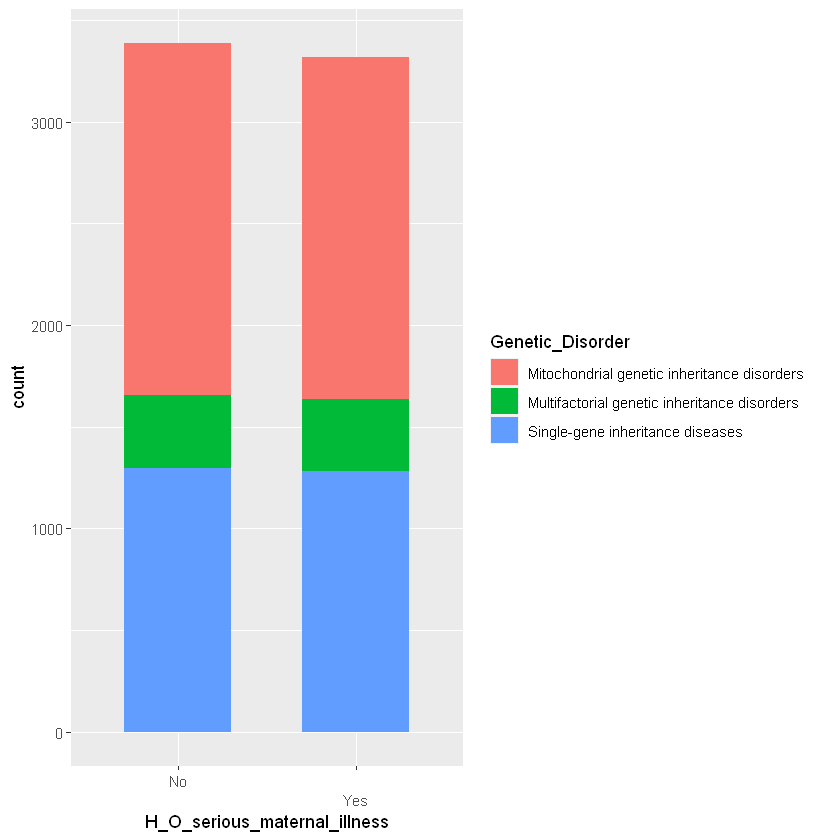

In [24]:

ggplot(data = df, aes(H_O_serious_maternal_illness ,fill = Genetic_Disorder)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

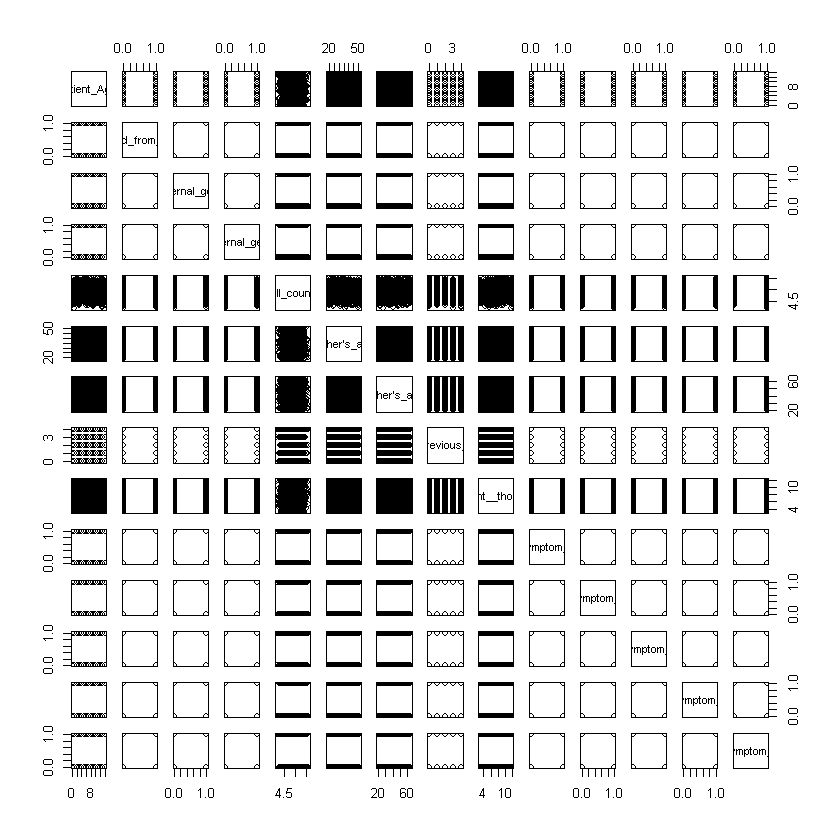

In [25]:
pairs(df[,!sapply(df,is.character)])

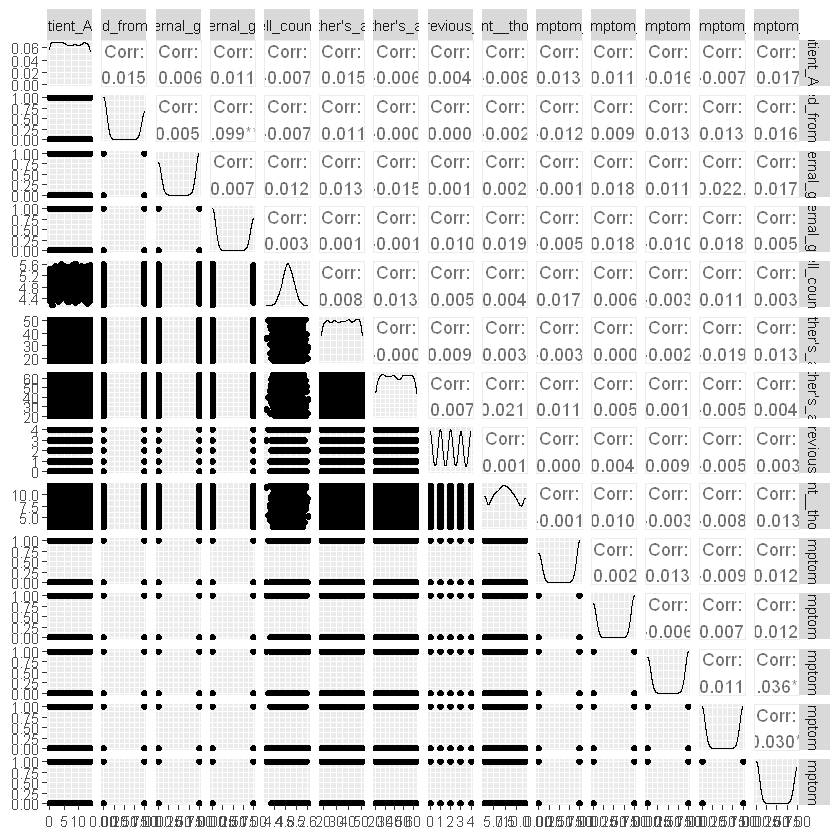

In [27]:
library(GGally)
ggpairs(df[,!sapply(df,is.character)])

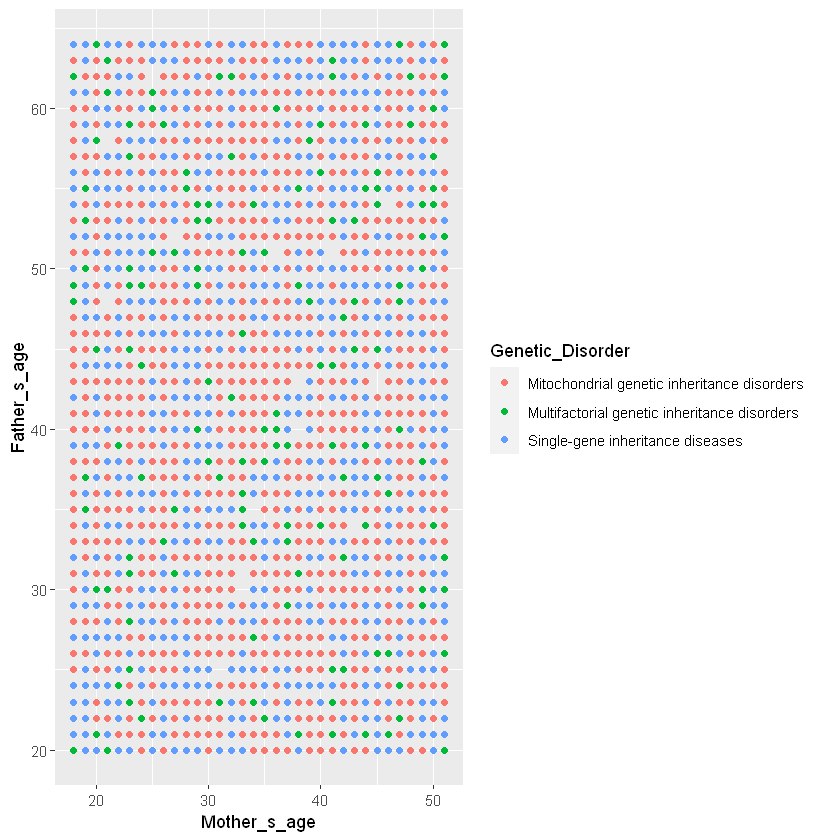

In [8]:
ggplot(data=df, aes(x=Mother_s_age, y=Father_s_age, color=Genetic_Disorder)) + 
  geom_point()

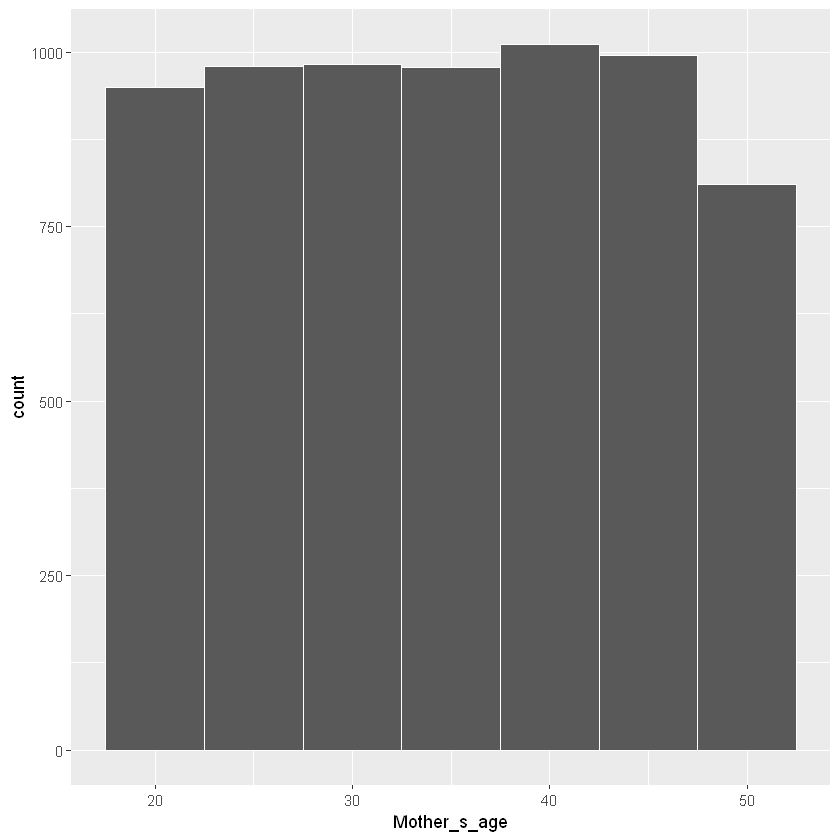

In [17]:
  ggplot(data=df,aes(x = Mother_s_age)) +
  geom_histogram(color = "white",  binwidth = 5) 

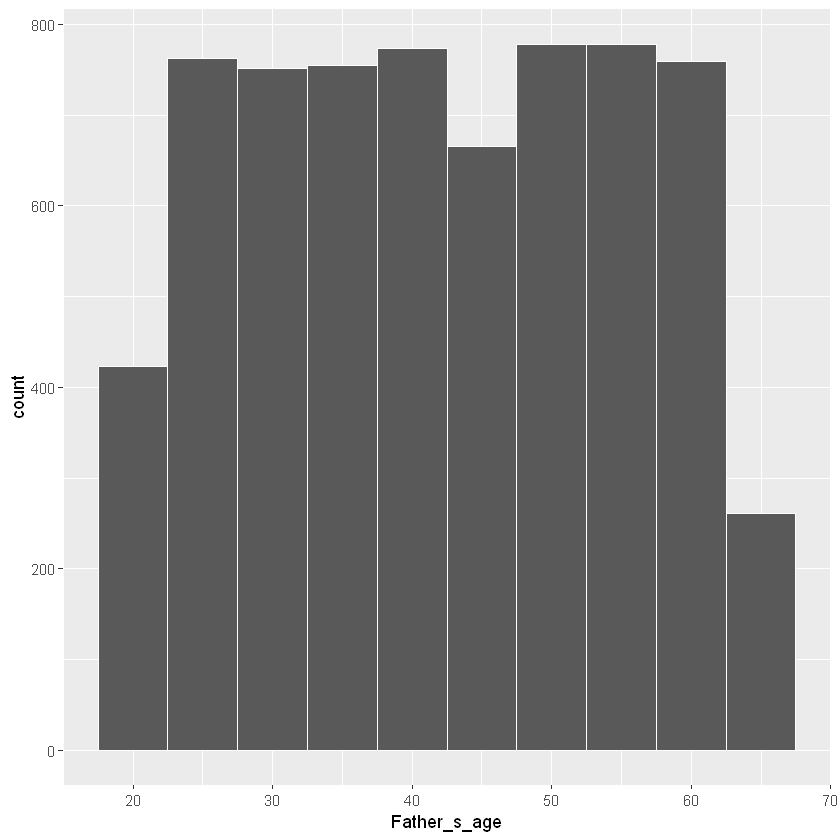

In [26]:
  ggplot(data=df,aes(x = Father_s_age)) +
  geom_histogram(color = "white",  binwidth = 5) 

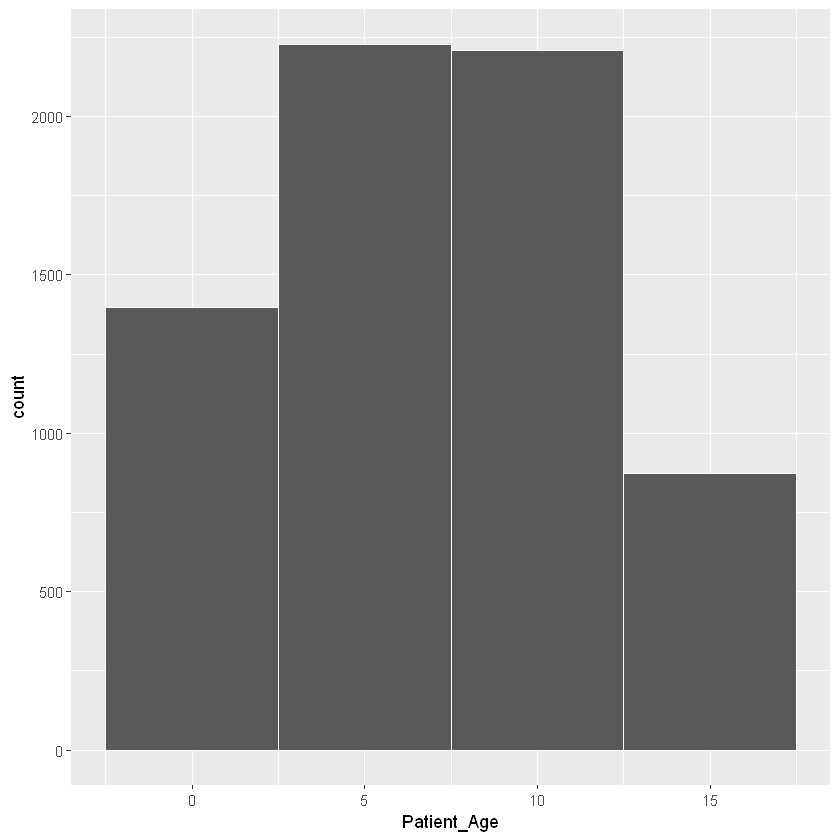

In [20]:
  ggplot(data=df,aes(x = Patient_Age)) +
  geom_histogram(color = "white",  binwidth = 5) 